In [1]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 1: Image Compression: JPEG

In this task, we will explore the effect of JPEG compression. You do not need to write the algorithm for JPEG compression. We will simply use the inbuilt `cv2.imwrite` function and will vary the Q value for JPEG compression. Note that here Q value is the quality.

To save the image at a quality = 50, use `cv2.imwrite('filename.jpeg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 50])`. 

Use the provided function `get_file_size()` to find the size of the file in KB. for eg: `get_file_size('filename.jpeg')`

### Your task
1. Upsample the original image by 2 >> downsample by 2 >> save at Q = 80
2. Downsample the original image by 2 >> upsample by 2 >> save at Q = 80
3. Apply an average filter of 5 x 5 on original image >> save at Q = 80

After you do the above three operations on the original image. Compare the size of the saved image. Is there’s any change, Yes/ No? If Yes, try to explain why? Write your explanation in your observations.

In [2]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-1dyrh8fn
  Created wheel for ee604-plugins: filename=ee604_plugins-0.4.2-cp36-none-any.whl size=2457 sha256=a6de44bf3f63c35c9f03f03cb4991b5a14768a2da7d61448c9a5051523d7315c
  Stored in directory: /tmp/pip-ephem-wheel-cache-_s44jwqz/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-1dyrh8fn


In [3]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage

def get_file_size(file_dir):
    b = os.path.getsize(file_dir)
    return round(b/1000, 1)

from ee604_plugins import download_dataset, cv2_imshow
download_dataset(assignment_no=4, task_no=1) # download data for this assignment

Download Complete!


In [4]:
def jpeg_playground(img):
    '''
    Inside this function do the task as described above, i.e.
      1. Upsample the original image by 2 >> downsample by 2 >> save at Q = 80
      2. Downsample the original image by 2 >> upsample by 2 >> save at Q = 80
      3. Apply an average filter of 5 x 5 on original image >> save at Q = 80
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    
    Ouputs:
    + Orig_img - Original image after compressing at Q = 80
    + Orig_size - Size of the saved image of Orig_img at Q = 80
    
    + UD_img - Image obtained after upsampling and downsampling
    + UD_size - Size of the saved image of UD_img at Q = 80
    
    + DU_img - Image obtained after downsampling and upsampling
    + DU_size - Size of the saved image of DU_img at Q = 80
    
    + Smooth_img - Image obtained after smoothing using average filter
    + Smooth_size - Size of the saved image of Smooth_img at Q = 80
    
    Allowed external package:
    + Any relevant module in openCV
    
    '''
    
    #############################
    # Start your code from here #
    #############################

    # Orig_image
    cv2.imwrite('Orig_img.jpeg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 80])
    Orig_img = cv2.imread('Orig_img.jpeg')
    Orig_size = get_file_size('Orig_img.jpeg')
    
    # UD_image
    img0 = cv2.resize(img.copy(), (0,0), fx = 2, fy = 2)
    img0 = cv2.resize(img0.copy(), (0,0), fx = 0.5, fy = 0.5)

    """
    for k in [2,0.5]:
        
        img1 = img0.copy()
        old_shape = img1.shape
        row_ratio, col_ratio = k, k
        # row interpolation 
        r_idx = (np.ceil(np.array(range(1, 1 + int(old_shape[0]*row_ratio)))/row_ratio) - 1).astype(int)
        # column interpolation
        c_idx = (np.ceil(np.array(range(1, 1 + int(old_shape[1]*col_ratio)))/col_ratio) - 1).astype(int)
        img0 = img1[:, r_idx][c_idx, :].astype('uint8')
    """

    cv2.imwrite('UD_img.jpeg', img0, [int(cv2.IMWRITE_JPEG_QUALITY), 80])
    UD_img = cv2.imread('UD_img.jpeg')
    UD_size = get_file_size('UD_img.jpeg')

    # DU_image
    img0 = cv2.resize(img.copy(), (0,0), fx = 0.5, fy = 0.5)
    img0 = cv2.resize(img0.copy(), (0,0), fx = 2, fy = 2)

    cv2.imwrite('DU_img.jpeg', img0, [int(cv2.IMWRITE_JPEG_QUALITY), 80])
    DU_img = cv2.imread('DU_img.jpeg')
    DU_size = get_file_size('DU_img.jpeg')

    # Average filter 5x5
    m, n = img.shape 
    img2 = np.pad(img, (2,), 'constant',  constant_values=(0)) 
    img0 = np.zeros((m, n))
    
    for i in range(m): 
        for j in range(n): 
            avg = 0
            for k in range(-2,3):
                for l in range(-2,3):
                    avg += img2[i+2+k,j+2+l]

            img0[i, j]= avg / 25

    img0 = img0.astype('uint8')
    cv2.imwrite('Smooth_img.jpeg', img0, [int(cv2.IMWRITE_JPEG_QUALITY), 80])
    Smooth_img = cv2.imread('Smooth_img.jpeg')
    Smooth_size = get_file_size('Smooth_img.jpeg')

    #############################
    # End your code here ########
    #############################   
    
    return Orig_img, Orig_size, UD_img, UD_size, DU_img, DU_size, Smooth_img, Smooth_size

### Observations

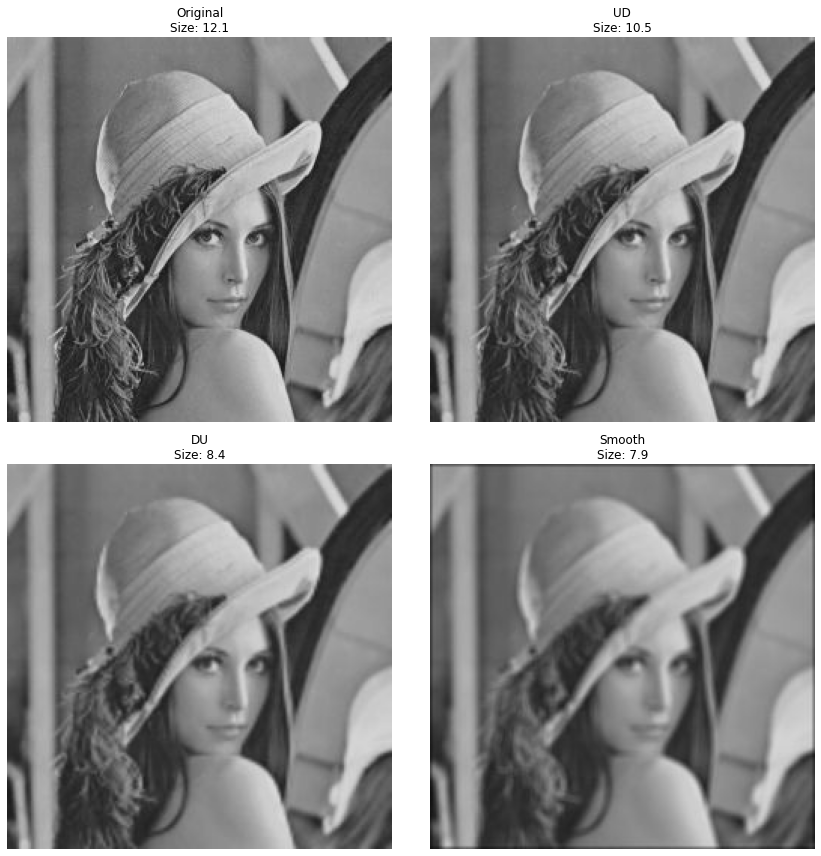

In [5]:
# Do not change codes inside this cell
# Add your observations in next cell
# Your observation should compare the images vs the size of the jpeg compression on different operations

img = cv2.imread("data/lena_gray.jpg", 0)

def plot_frame(gridx, gridy, subplot_id, img, name):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray")
    plt.axis("off")
    plt.title(name)

Orig_img, Orig_size, UD_img, UD_size, DU_img, DU_size, Smooth_img, Smooth_size = jpeg_playground(img)

fig = plt.figure(figsize=(12, 12))
plot_frame(2, 2, 0, Orig_img, "Original\nSize: " + str(Orig_size))
plot_frame(2, 2, 1, UD_img, "UD\nSize: " + str(UD_size))
plot_frame(2, 2, 2, DU_img, "DU\nSize: " + str(DU_size))
plot_frame(2, 2, 3, Smooth_img, "Smooth\nSize: " + str(Smooth_size))
fig.tight_layout()
plt.show()

In [6]:
your_observation = """
Smoothing has the least size followed by DU and then UD.
Which is the opposite trend of their image clarity sa observed above
"""

print(your_observation)


Smoothing has the least size followed by DU and then UD.
Which is the opposite trend of their image clarity sa observed above

